In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [151]:
import openpyxl

In [152]:


ny_real = pd.read_excel('../data/Table.xlsx')


In [153]:
ny_real

,Area,Borough,Median Asking Price,Median Asking Price Yoy % Change,Median Asking Rent,Median Asking Rent Yoy % Change,Median Recorded Sales Price,Median Recorded Sales Price Yoy % Change
0,All Downtown,Manhattan,$2.195.000,0.219,$4.500,0.452,$1.483.500,0.067
1,All Midtown,Manhattan,$1.225.000,0.225,$4.350,0.500,$713.500,-0.002
2,All Upper East Side,Manhattan,$1.675.000,0.117,$3.400,0.388,$1.122.250,0.207
3,All Upper Manhattan,Manhattan,$699.000,0.000,$2.399,0.091,$659.000,-0.060
4,All Upper West Side,Manhattan,$1.837.500,0.317,$4.000,0.431,$1.372.500,0.168
...,...,...,...,...,...,...,...,...
148,Whitestone,Queens,$649.444,-0.236,NaN,-0.167,$918.000,0.080
149,Williamsburg,Brooklyn,$1.323.250,-0.020,$3.795,0.365,$1.151.500,0.163
150,Windsor Terrace,Brooklyn,$980.000,0.154,$2.894,0.052,NaN,-0.143
151,Woodhaven,Queens,$724.500,0.156,$2.250,0.125,NaN,0.021


In [154]:
ny_real.columns

Index(['Area', 'Borough', 'Median Asking Price',
       'Median Asking Price Yoy %  Change', 'Median Asking Rent',
       'Median Asking Rent Yoy %  Change', 'Median Recorded Sales Price',
       'Median Recorded Sales Price Yoy %  Change'],
      dtype='object')

In [155]:
ny_real.Borough.unique()

array(['Manhattan', 'Queens', 'Brooklyn'], dtype=object)

In [156]:
# Rellenar los valores nulos de la columna "b" con los valores de la columna "a"
ny_real['Median Recorded Sales Price'] = ny_real['Median Recorded Sales Price'].fillna(ny_real['Median Asking Price'])

In [157]:
ny_real = ny_real.drop(columns=['Area', 'Median Asking Price Yoy %  Change', 'Median Asking Rent Yoy %  Change', 'Median Asking Price','Median Recorded Sales Price Yoy %  Change'])

In [158]:
ny_real = ny_real.dropna()

In [159]:
ny_real

,Borough,Median Asking Rent,Median Recorded Sales Price
0,Manhattan,$4.500,$1.483.500
1,Manhattan,$4.350,$713.500
2,Manhattan,$3.400,$1.122.250
3,Manhattan,$2.399,$659.000
4,Manhattan,$4.000,$1.372.500
...,...,...,...
147,Manhattan,$4.495,$1.341.906
149,Brooklyn,$3.795,$1.151.500
150,Brooklyn,$2.894,$980.000
151,Queens,$2.250,$724.500


In [160]:
ny_real['Median Asking Rent'] = ny_real['Median Asking Rent'].str.replace('$', '').str.replace('.', '').str.replace(',', '.').astype(int)
ny_real['Median Recorded Sales Price'] = ny_real['Median Recorded Sales Price'].str.replace('$', '').str.replace('.', '').str.replace(',', '.').astype(int)




C:\Users\river\AppData\Local\Temp\ipykernel_23520\2491306272.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ny_real['Median Asking Rent'] = ny_real['Median Asking Rent'].str.replace('$', '').str.replace('.', '').str.replace(',', '.').astype(int)
C:\Users\river\AppData\Local\Temp\ipykernel_23520\2491306272.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ny_real['Median Recorded Sales Price'] = ny_real['Median Recorded Sales Price'].str.replace('$', '').str.replace('.', '').str.replace(',', '.').astype(int)


In [161]:
ny_real

,Borough,Median Asking Rent,Median Recorded Sales Price
0,Manhattan,4500,1483500
1,Manhattan,4350,713500
2,Manhattan,3400,1122250
3,Manhattan,2399,659000
4,Manhattan,4000,1372500
...,...,...,...
147,Manhattan,4495,1341906
149,Brooklyn,3795,1151500
150,Brooklyn,2894,980000
151,Queens,2250,724500


In [162]:
ny_real=round(ny_real.groupby('Borough').mean().reset_index(),2)

ny_real

,Borough,Median Asking Rent,Median Recorded Sales Price
0,Brooklyn,2716.45,1158306.83
1,Manhattan,4044.71,1475735.51
2,Queens,2182.22,648610.00


Como faltan Staten Island y el Bronx busco los datos en internet y los añado

In the Bronx, the median asking rent remained essentially unchanged at $1,900, and in Staten Island, it actually increased 1 percent to $1,950.

https://furmancenter.org/stateofthecity/view/state-of-renters-and-their-homes-2020

Staten Island : $584.5K Median Sold Home Price

Bronx : $559.5K Median Sold Home Price

Añado los datos a la tabla:

In [163]:
nueva_fila_1 = ['Staten Island', 1950, 584500]
nueva_fila_2 = ['Bronx', 1900, 559500]

ny_real = ny_real.append({'Borough': nueva_fila_1[0], 'Median Asking Rent': nueva_fila_1[1], 'Median Recorded Sales Price': nueva_fila_1[2]}, ignore_index=True)
ny_real = ny_real.append({'Borough': nueva_fila_2[0], 'Median Asking Rent': nueva_fila_2[1], 'Median Recorded Sales Price': nueva_fila_2[2]}, ignore_index=True)


C:\Users\river\AppData\Local\Temp\ipykernel_23520\1298311832.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ny_real = ny_real.append({'Borough': nueva_fila_1[0], 'Median Asking Rent': nueva_fila_1[1], 'Median Recorded Sales Price': nueva_fila_1[2]}, ignore_index=True)
C:\Users\river\AppData\Local\Temp\ipykernel_23520\1298311832.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ny_real = ny_real.append({'Borough': nueva_fila_2[0], 'Median Asking Rent': nueva_fila_2[1], 'Median Recorded Sales Price': nueva_fila_2[2]}, ignore_index=True)


In [164]:
ny_real

,Borough,Median Asking Rent,Median Recorded Sales Price
0,Brooklyn,2716.45,1158306.83
1,Manhattan,4044.71,1475735.51
2,Queens,2182.22,648610.00
3,Staten Island,1950.00,584500.00
4,Bronx,1900.00,559500.00


In [165]:
#ny_real.to_csv('ny_real.csv', index=False)

In [166]:
a = ny_real.plot;
a

In [171]:

# crear dos dataframes diferentes para los precios de alquiler y venta
df_rent = ny_real[['Borough', 'Median Asking Rent']]
df_sales = ny_real[['Borough', 'Median Recorded Sales Price']]


<Axes: title={'center': 'Median Recorded Sales Price by Borough'}, xlabel='Borough'>

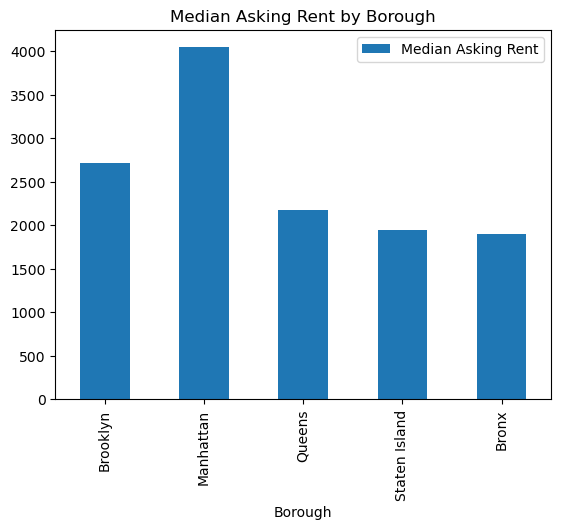

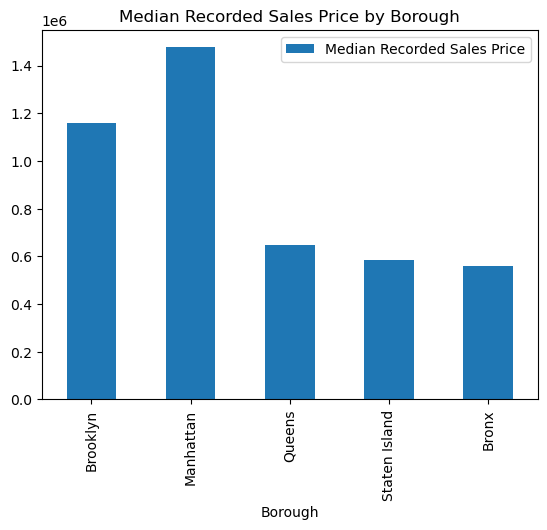

In [172]:
df_rent.plot(kind='bar', x='Borough', y='Median Asking Rent', title='Median Asking Rent by Borough')
df_sales.plot(kind='bar', x='Borough', y='Median Recorded Sales Price', title='Median Recorded Sales Price by Borough')
